# Problem Set 2 (93 points)

## Important information
1.  We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

2.  Please submit the single Jupyter Notebook file, where only Python and Markdown/$\\LaTeX$ are used. Any hand-written solutions inserted by photos or in any other way **are prohibitive and will not be graded**. If you will have any questions about using Markdown, ask them!
3.  The works will be checked for **plagiarism**. The score will be divided by the number of similar works.

## Submatrices (bonus).


Let $U$ be an $n \times r$ orthogonal matrix, $n \geq r$. It is well known, that such matrix has $r \times r$ non-singular submatrix $\hat{U}$. To measure ``non-singularity'' of this submatrix one can use the minimal singular value, or the norm of the inverse $\Vert \hat{U}^{-1} \Vert.$

Suppose we select the submatrix that has the smallest possible norm of the inverse among all $r \times r$ submatrices of $U$. What is the maximal value of such norm? Mathematically, we need to estimate

$$t(n, r) = \max_U \min_{\hat{U}} \Vert \hat{U}^{-1} \Vert_2.$$

Is it true that $t(n, r) \leq \sqrt{n}$?




# Problem 1 (QR algorithm) (22 pts)

One of the way to find eigenvalues for real matrix $A$ of size $(n,n)$ is **QR algorithm**. Each iteration of the algorithm consists of two main steps:

1. Compute QR decompostion $A_k = Q_kR_k$
2. Compute new matrix $A_{k+1} = R_kQ_k$

$A_0 = A$

From lecture materials you have seen that algorithm complexity in general is $O(Nn^3)$ ($N$ - number of iterations). But we can make an improvement by transforming matrix to **Upper Hessenberg form** ([link](https://en.wikipedia.org/wiki/Hessenberg_matrix)) before running the algorithm. 

The good property of Hessenberg matrix is preservation of its structure during QR algorithm iteration. In other words, if $A_{k}$ is Hessenberg matrix, then $A_{k+1}$ will also be a Hessenberg matrix. We can use this property to reduce complexity of each iteration. Since we need only to zero first lower subdiagonal for QR factorization (first step in each iteration) we can use **Givens rotations** $O(n^2)$ instead of **Householder reflections** $O(n^3)$. Now, the last question is how to obtain Hessenberg matrix - use Householder reflections. Since it is done only once (initialization stage), complexity of algorithm will not be increased.

Final algorithm:

I. **Initialization**

> - Transform original matrix $A$ to Hessenberg form $H_0 = U^TAU$ using Householder reflections.

II. **Loop**

> **for** k in range(**N**):
> -  Compute QR using Givens rotation: such matrices $Q_k,R_k$ that $H_k = Q_kR_k$

> - Update matrix $H_{k+1} = R_k Q_k$



## What do you need to do:
### Theoretical part
<!-- 1. For real square metrices $Q,A,\hat{A}$ prove that if we have relation $A = Q^T\hat{A}Q$ ($Q$ - orthogonal matrix) then eigenvalues of $A$ and $\hat{A}$ are equal. **(3 pts)**
2. Suppose we factorize real square matrix $A = Q^TTQ$, where $Q$ is orthogonal and $T$ is upper/lower triangular matrix. Describe the easiest way to find eigenvalues of $A$. **(2 pts)** -->
1. Show that Hessenberg matrix preserves its structure under QR algorithm: if $A_k$ hessenberg matrix then $A_{k+1}$ hessenberg as well. **(5 pts)**

2. **(Bonus task)** For real square matrix $A$, which all leading minors are nondegenerate, prove that QR algorithm converges to upper triangular matrix: $\lim\limits_{k\rightarrow \infty} A_k = T$, where $T$ - upper triangular matrix.

### Practical part

1. Implement function **Hessenberg_Transform** which takes a real square matrix $A$ and returns transformed matrix in Hessenberg form $H$ (use householder reflections). **(5 pts)**

2. Implement function **QR_givens** which takes a real square matrix in Hessenberg form $H$ and returns QR factorization: matrices $Q$ and $R$. **(5 pts)**

3. Implement function **QR_algorithm**, which takes a real square matrix $A$ and returns $H_{N}$ - the result of $N$ iterations of QR algorithm. Use previously implemented **Hessenberg_Transform** to get Hessenberg form of matrix $A$, and  **QR_givens** to make QR factorization on each iteration. **(2 pts)**

4. Varing parameter $n$ generate random matrix of size $(n,n)$ and measure the computation time of **QR_algorithm** function. Plot observed data: computation time versus $n$. Use logarithmic scale for both axes. Explain obtained results.**(3 pts)**

5. Compare eigenvalues computed using your implemented algorithm and standard numpy functionality for some random matrix. Try different number of iterations for the algorithm. Explain results. **(2 pts)**

### Theoretical proofs

1. We have $A_k$ matrix:
  $A_k = Q_k R_k$. Since $A_k$ is hessenberg matrix, we can use Givens rotations to transform it to upper triangular. We need (n-1) such matrices beacuse we need to make zeros all elements under diagonal of matrix.\
  So, we have $G_1 G_2 \ldots G_{n-1} A_k = R_k \to A_k = (G_1 G_2 \ldots G_{n-1})^* R_k = Q_kR_k, Q_k = (G_1 G_2 \ldots G_{n-1})^*$.\
  Now, $A_{k+1} = R_k (G_1 G_2 \ldots G_{n-1})^* = R_k G_{n-1}^* \ldots G_2^* G_1^*$. Givens matrices are rotation matrices, so if $G$ rotate axes, corresponding to $i$ and $j$ on angle $\alpha$, then $G^*$ rotate those axes on angle $-\alpha$, in other words rotate it back.
    Using $G_i^k = \begin{pmatrix}
    0 & \ldots & 0 & 0 & \ldots\\
    \vdots & \ldots & \cos\alpha & -\sin\alpha & \ldots\\
    \vdots & \ldots & \sin\alpha & \cos\alpha & \ldots\\
    0 & \ldots & 0 & 0 & \ldots
    \end{pmatrix}$,(cosines are on diagonal, on i-th and (i+1)-th columns) where $\cos \alpha  = \frac{a_{ii}^k}{\sqrt{|a_{ii}^k|^2 + |a_{i(i+1)}^k|^2}}, \sin\alpha = \frac{-a_{i(i+1)}^k}{\sqrt{|a_{ii}^k|^2 + |a_{i(i+1)}^k|^2}}$, we make zero of $a_{i(i+1)}^k$.\
    $G_i^{k*} = \begin{pmatrix}
    0 & \ldots & 0 & 0 & \ldots\\
    \vdots & \ldots & \cos\alpha & \sin\alpha & \ldots\\
    \vdots & \ldots & -\sin\alpha & \cos\alpha & \ldots\\
    0 & \ldots & 0 & 0 & \ldots
    \end{pmatrix}$. Multiplying $R_k G_{n-1}^*$, we get elements $r_{ij}^k, i,j = 1,\ldots (n-2)$ preserved, thus elements $r_{n, j}, n > j+1$ stays zero. Then, we have $R_k G_{n-1}^*G_{n-2}^*$, where zeros on $n-1$-th row, where $n-1 > j + 1$ preserved, and last row doesn't change. And so on. Beacuse of it we have $A_{k+1} = R_k G_{n-1}^* \ldots G_2^* G_1^*$ - hessenberg matrix.

In [17]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import linalg as la

In [ ]:
def Hessenberg_Transform(A):
    A_copy = A.copy()
    for i in range(1, A_copy.shape[1]-1):
        vec = A_copy[i:,i-1]
        vec_norm = np.linalg.norm(vec)
        z = vec.copy()
        z[0] -= vec_norm
        norm = np.linalg.norm(z)
        if norm > 1e-15:
            z = z / norm
        P = np.eye(A_copy.shape[0])
        P[i:,i:] -= 2 * np.outer(z, z)
        A_copy = P @ A_copy @ P
    H = A_copy
    return H

In [ ]:
def QR_givens(H):
    Q = np.eye(H.shape[0])
    R = H.copy()

    for i in range(H.shape[1]-1):
        hi = R[i,i]
        hj = R[i+1,i]
        cos = hi / np.sqrt(hi**2 + hj**2)
        sin = -hj / np.sqrt(hi**2 + hj**2)

        Q[i], Q[i+1] = Q[i] * cos - Q[i+1] * sin, Q[i] * sin + Q[i+1] * cos
        R[i], R[i+1] = R[i] * cos - R[i+1] * sin, R[i] * sin + R[i+1] * cos 

    return Q.T,R

In [ ]:
def QR_algorithm(A, N_iterations):
    H = Hessenberg_Transform(A)
    for i in range(N_iterations):
        Q,R = QR_givens(H)
        H = R @ Q
    return H

In [ ]:
n_ = {50:[], 100:[], 150:[]}
time_ = {50:[], 100:[], 150:[]}
N_iter = [50, 100, 150]
for n_iter in N_iter:
    for n in range(4,100,4):
        matrix = np.random.uniform(100,-100,(n,n))
        start = time.time()
        QR_algorithm(matrix, n_iter)
        end = time.time()
        n_[n_iter].append(n)
        time_[n_iter].append(end-start)

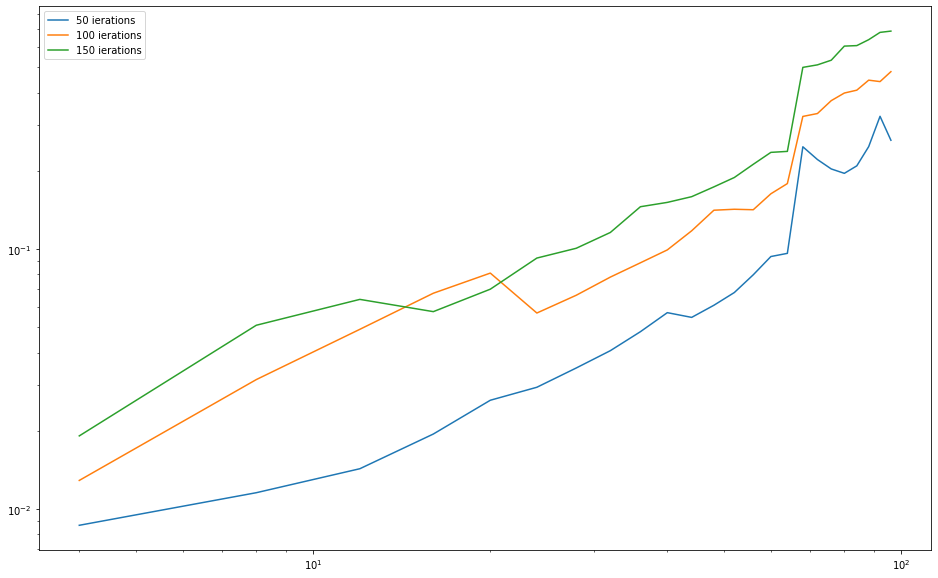

In [ ]:
plt.plot(n_[50], time_[50], label='50 ierations')
plt.plot(n_[100], time_[100], label='100 ierations')
plt.plot(n_[150], time_[150], label='150 ierations')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

On this plot $log(time) = a*log(n) + c$, cause graph is linear. So we have dependence like $O(time) = O(n^a)$.

In [ ]:
matrix = np.random.uniform(100,-100,(20,20))
matrix = matrix.T @ matrix
true_eigvals, _ = np.linalg.eig(matrix)

H1 = QR_algorithm(matrix, 5)
Q1, R1 = QR_givens(H1)
my_eigvals1 = R1.diagonal()

H2 = QR_algorithm(matrix, 10)
Q2, R2 = QR_givens(H2)
my_eigvals2 = R2.diagonal()

H3 = QR_algorithm(matrix, 50)
Q3, R3 = QR_givens(H3)
my_eigvals3 = R3.diagonal()

H4 = QR_algorithm(matrix, 100)
Q4, R4 = QR_givens(H4)
my_eigvals4 = R4.diagonal()

In [ ]:
print(true_eigvals)
print(R1.diagonal())
print(R2.diagonal())
print(R3.diagonal())
print(R4.diagonal())

[2.19769370e+05 1.87825439e+05 1.74602402e+05 1.35833756e+05
 1.22968565e+05 1.01033027e+05 8.15061563e+04 6.72394038e+04
 6.03805186e+04 5.16032995e+04 4.55158361e+04 4.08442957e+04
 2.74887932e+04 2.44855407e+04 1.38116604e+04 1.14533391e+04
 3.64551527e+03 9.84983612e+02 3.62528710e+02 7.67784548e+00]
[2.18133581e+05 1.56115005e+05 1.56736071e+05 9.81043404e+04
 1.07486507e+05 1.05528823e+05 8.80200789e+04 6.22977307e+04
 6.03634693e+04 3.47568662e+04 4.84370397e+04 4.57058855e+04
 2.91738235e+04 2.72788789e+04 2.88137038e+04 1.06335962e+04
 4.06306794e+03 9.84763401e+02 3.62610342e+02 7.67784548e+00]
[2.19550860e+05 1.84489025e+05 1.39762893e+05 1.64798676e+05
 1.14342197e+05 1.06553297e+05 7.32614703e+04 7.10442547e+04
 4.74371589e+04 5.74353209e+04 4.61739142e+04 3.17513863e+04
 4.09627769e+04 2.68077319e+04 1.37696290e+04 1.15054668e+04
 3.64551967e+03 9.84983602e+02 3.62528714e+02 7.67784548e+00]
[2.19769369e+05 1.87823157e+05 1.74604522e+05 1.35833397e+05
 1.22968887e+05 1.010

In [ ]:
print(R1.diagonal() - true_eigvals)
print(R2.diagonal() - true_eigvals)
print(R3.diagonal() - true_eigvals)
print(R4.diagonal() - true_eigvals)

[-1.63578814e+03 -3.17104342e+04 -1.78663305e+04 -3.77294157e+04
 -1.54820580e+04  4.49579615e+03  6.51392261e+03 -4.94167312e+03
 -1.70493068e+01 -1.68464333e+04  2.92120362e+03  4.86158981e+03
  1.68503032e+03  2.79333825e+03  1.50020434e+04 -8.19742883e+02
  4.17552672e+02 -2.20211002e-01  8.16322150e-02 -1.11972653e-11]
[-2.18509786e+02 -3.33641399e+03 -3.48395083e+04  2.89649198e+04
 -8.62636835e+03  5.52026956e+03 -8.24468601e+03  3.80485085e+03
 -1.29433597e+04  5.83202135e+03  6.58078097e+02 -9.09290943e+03
  1.34739837e+04  2.32219122e+03 -4.20314880e+01  5.21277338e+01
  4.39840907e-03 -1.01164546e-05  3.72454531e-06 -1.11972653e-11]
[-7.21130695e-04 -2.28203368e+00  2.12086822e+00 -3.59632654e-01
  3.21939395e-01  3.51937098e-03 -7.46299775e-05 -6.94028953e+01
  6.23845216e+01 -9.45033567e-01 -3.57435432e+00  3.95805996e+00
 -5.23026730e-01  4.65892986e-01 -2.00944778e-05  1.66633054e-05
 -8.18545232e-12 -1.20508048e-11 -1.54614099e-11 -1.11972653e-11]
[-1.74622983e-10 -1.54

As we can see, the more iterations we do, more similar eigenvalues of H to true eigenvalue

# Problem 2 (Stochastic trace estimation) (30 pts) 

In this problem we consider stochastic estimation of trace for implicitly-defined matrices.

Impicitly-defined matrices are such that matrix-vector multiplication is easy to perform, but matrix entries are not easy to obtain (examples are given by integral kernels, products of sparse matrices, products of a set of circulants, low-rank matrices given in a compressed form, etc).

In such cases it is often possible to approximate trace with $k\ll N$ matrix-vector products, where $N$ is the size of matrix.

One popular way to obtain stochastic estimate is Hutchinson algorithm.

## Hutchinson algorithm
Let $u$ be a random vector from $\mathbb{R}^{n}$ with independent identicaly distributed entries $u_i$ each having zero mean and variance $\sigma^2$.

Let $B$ be a symmetric matrix from $\mathbb{R}^{n\times n}$.

Hutchinson algorithm is roughly as follows:

    trace_estimate = 0
    for i=1:N do
        u = random_vector
        trace_estimate += (u,Bu)
    end do
    trace_estimate /= N

So Hutchinson algorithm uses empirical mean $u^\top B u$ as a trace estimation. Below we ask you to find properties of this estimator.

**Subproblem 1 (5 pts)**

1. Show that $\mathbb{E}\left[u^\top B u\right] = \sigma^2 \text{tr} B$, where $\mathbb{E}\left[\cdot\right]$ denotes average wrt $u$.

$\mathbb{E}[u^\top Bu] = \mathbb{E}[\sum\limits_{i,j=1}^nb_{ij}u_iu_j] = \mathbb{E}[\sum\limits_{i=1}^nb_{ii}u_i^2 + \sum\limits_{i \neq j}^nb_{ij}u_iu_j] = \sum\limits_{i=1}^nb_{ii}\mathbb{E}[u_i^2] + \mathbb{E}[\sum\limits_{i \neq j}^nb_{ij}u_iu_j] = \mathbb{E}[u_1^2]\sum\limits_{i=1}^nb_{ii} + \sum\limits_{i \neq j}^nb_{ij}\mathbb{E}[u_iu_j]$\
$\mathbb{E}[u_iu_j] = \mathbb{E}[u_i]\mathbb{E}[u_j] = 0$, since $u_i$ and $u_j$ independent.\
$\sigma^2 = var(u_i) = \mathbb{E}[u_i^2] - (\mathbb{E}[u_i])^2 = \mathbb{E}[u_i^2]\ \forall i$\
Thus we have $\mathbb{E}[u^\top Bu] = \mathbb{E}[u_1^2]\sum\limits_{i=1}^nb_{ii} + \sum\limits_{i \neq j}^nb_{ij}\mathbb{E}[u_iu_j] = \sigma^2 trB$


2. Show that $\text{var}\left[u^\top B u\right] = 2\sigma^4 \sum_{i\neq j}B_{ij}^2 + \left(\mathbb{E}\left[u^4\right] - \sigma^4\right)\sum_{i}B_{ii}^2$, where $\text{var}$ denotes [variance](https://en.wikipedia.org/wiki/Variance).

var $[u^\top B u] = \mathbb{E}[\sum\limits_{i,j=1}^nb_{ij}u_iu_j]^2 - (\mathbb{E}[\sum\limits_{i,j=1}^nb_{ij}u_iu_j])^2$\
$\mathbb{E}[\sum\limits_{i,j=1}^nb_{ij}u_iu_j]^2 = \mathbb{E}[\sum\limits_{i,j,k,l=1}^nb_{ij}b_{kl}u_iu_ju_ku_l] = \mathbb{E}[\sum\limits_{i\neq j\neq k\neq l}^nb_{ij}b_{kl}u_iu_ju_ku_l] + 2\mathbb{E}[\sum\limits_{i\neq k\neq l}^nb_{ii}b_{kl}u_i^2u_ku_l] + \mathbb{E}[\sum\limits_{i\neq j\neq l}^nb_{ij}b_{il}u_i^2u_ju_l] + 2\mathbb{E}[\sum\limits_{i\neq j\neq k}^nb_{ij}b_{ki}u_i^2u_ju_k] + \mathbb{E}[\sum\limits_{j\neq i\neq k}^nb_{ij}b_{kj}u_j^2u_iu_k] + \mathbb{E}[\sum\limits_{i\neq j}^nb_{ii}b_{jj}u_i^2u_j^2] + \mathbb{E}[\sum\limits_{i\neq j}^nb_{ij}b_{ji}u_i^2u_j^2] + \mathbb{E}[\sum\limits_{i\neq j}^nb_{ij}^2u_i^2u_j^2] + 2\mathbb{E}[\sum\limits_{i\neq j}^nb_{ii}b_{ij}u_i^3u_j] + 2\mathbb{E}[\sum\limits_{i\neq j}^nb_{ii}b_{ji}u_i^3u_j] + \mathbb{E}[\sum\limits_{i}^nb_{ii}^2u_i^4]$\
$\mathbb{E}[u_iu_ju_ku_l] =\mathbb{E}[u_i]\mathbb{E}[u_j]\mathbb{E}[u_k]\mathbb{E}[u_l]=0, \mathbb{E}[u_i^2u_ku_l]=\mathbb{E}[u_i^2]\mathbb{E}[u_k]\mathbb{E}[u_l]=0, \mathbb{E}[u_i^3u_j]=\mathbb{E}[u_i^3]\mathbb{E}[u_j]=0$\
$\mathbb{E}[u_i^2u_j^2] = \mathbb{E}[u_i^2]\mathbb{E}[u_j^2]=\sigma^4$ Thus we have:\
$\mathbb{E}[\sum\limits_{i,j=1}^nb_{ij}u_iu_j]^2 = \sigma^4 (\sum\limits_{i\neq j}^nb_{ii}b_{jj} + \sum\limits_{i\neq j}^nb_{ij}b_{ji} + \sum\limits_{i\neq j}^nb_{ij}^2) + \mathbb{E}[u^4]\sum\limits_{i}^nb_{ii}^2 = \sigma^4 (\sum\limits_{i\neq j}^nb_{ii}b_{jj} + 2\sum\limits_{i\neq j}^nb_{ij}^2) + \mathbb{E}[u^4]\sum\limits_{i}^nb_{ii}^2$ due to symmetric matrix B\
$(\mathbb{E}[\sum\limits_{i,j=1}^nb_{ij}u_iu_j])^2 = (\sigma^2trB)^2 = \sigma^4\sum\limits_i^n b_{ii}^2 + \sigma^4\sum\limits_{i\neq j}^n b_{ii}b_{jj}$\
So finally:\
var $[u^\top B u] = \sigma^4 (\sum\limits_{i\neq j}^nb_{ii}b_{jj} + 2\sum\limits_{i\neq j}^nb_{ij}^2) + \mathbb{E}[u^4]\sum\limits_{i}^nb_{ii}^2 - \sigma^4\sum\limits_i^n b_{ii}^2 - \sigma^4\sum\limits_{i\neq j}^n b_{ii}b_{jj} = 2\sigma^4\sum\limits_{i\neq j}^nb_{ij}^2 + (\mathbb{E}[u^4] - \sigma^4)\sum\limits_i^n b_{ii}^2$

3. Find the variance for the case when:

  a. each $u_{i}\sim \mathcal{N}(0, \sigma^2)$, i.e., for normally distributed with zero mean and variance $\sigma^2$;

  b. each $u_{i}$ follows [Rademacher distribution](https://en.wikipedia.org/wiki/Rademacher_distribution);

a. $\mathbb{E}[u^4] = 3\sigma^4 \to var[u^\top Bu] = 2\sigma^4 \sum_{i\neq j}B_{ij}^2 + \left(3\sigma^4 - \sigma^4\right)\sum_{i}B_{ii}^2 = 2\sigma^4 \sum_{i\neq j}B_{ij}^2 + 2\sigma^4\sum_{i}B_{ii}^2 = 2\sigma^4 \sum_{i,j}B_{ij}^2 = 2\sigma^4 \|B\|_F^2$

b. $\mathbb{E}[u] = 0, var[u] = \mathbb{E}[u^2] = 1$. u takes values -1 or +1, so $u^4$ will always be 1 and thus: $\mathbb{E}[u^4]=1$.\
$var[u^\top Bu] = 2 \sum_{i\neq j}B_{ij}^2 + \left(1 - 1\right)\sum_{i}B_{ii}^2 = 2 \sum_{i\neq j}B_{ij}^2$

4. Why variance matters.
  
  Let $z_1, \dots, z_N$ are independent identicaly distributed samples of random variable with mean $\mu$ and variance $\sigma^2$ and $\hat{\mu} = \frac{1}{N}\sum_{i=1}^{N} z_{i}$ is a standard Monte Carlo extimator for mean.

  a. Show that $\mathbb{E}\left[\hat{\mu}\right] = \mu$ and $\text{var}\left[\hat{\mu}\right] = \sigma^2 \big/ N$.

  b. Use [Chebyshev inequality](https://en.wikipedia.org/wiki/Chebyshev%27s_inequality) to find the number of samples $N$ you need to use to guarante that estimate $\hat{\mu}$ deviates from $\mu$ on $\epsilon\ll 1$ with probability at most $\delta\ll 1$.

a. $\mathbb{E}[\hat{\mu}] = \mathbb{E}[\frac{1}{N}\sum_{i=1}^{N} z_{i}] = \frac{1}{N}\sum_{i=1}^{N}\mathbb{E}[z_i] = \frac{1}{N}\sum_{i=1}^{N} \mu = \mu$

$var[\hat{\mu}] = var[\frac{1}{N}\sum_{i=1}^{N} z_{i}] = \frac{1}{N^2}\sum_{i=1}^{N}var[z_i]$ due to independentness. $\frac{1}{N^2}\sum_{i=1}^{N}var[z_i] = \frac{1}{N^2}\sum_{i=1}^{N}\sigma^2 = \frac{\sigma^2}{N}$

b. $\mathbb{P}[|\hat{\mu}-\mu| \geq \epsilon] \leq \frac{\sigma^2}{N\epsilon^2} \leq \delta \to N \geq \frac{\sigma^2 }{\delta \epsilon^2}$

5. Does the variance of the estimator matters?

  a. Adapt bounds from _Subproblem 1 point 4.b_ for Hutchinson algorithm with normal and Rademacher distributions.

  b. Empirically evaluate variances from _Subproblem 1 point 2_ using several sparse, low-rank and circulant matrices.

  c. Comment on practicality of Chebyshev bounds. What is the number of iterations you need to perform to achieve reasonably small error with reasonably large probability according to this bound?

a. For normal distribution $\mathbb{P}[|\frac{1}{N}\sum_{i=1}^{N} u_i^\top Bu_i-\sigma^2 \text{tr} B| \geq \epsilon] \leq \frac{1}{N \epsilon^2} 2\sigma^4 \|B\|_F^2 \leq \delta \to N \geq \frac{2\sigma^4 \|B\|_F^2}{\epsilon^2\delta}$\
For Rademacher: $N \geq \frac{2 \sum_{i\neq j}B_{ij}^2}{\delta \epsilon^2}$

In [19]:
from scipy.sparse import random
from scipy.linalg import circulant
from scipy.sparse.linalg import svds, norm

In [31]:
def gen_circ(size):
    n = np.random.uniform(-100,100, size)
    return circulant(n)

def gen_low_rank(size):
    matrix = np.random.uniform(-100,100,(size,size))
    u, s, vt = svds(matrix, k=10)
    
    return u @ np.diag(s) @ vt

def gen_sparse(size):
    return random(size, size)

Sparse:

In [53]:
sparse1 = gen_sparse(100)
var1 = 2*(norm(sparse1)**2 - (sparse1.diagonal()**2).sum())
U = np.random.binomial(1, 0.5, (50, sparse1.shape[0]))
U = 2 * U - 1
stat = ((U @ sparse1) * U).sum(axis=1)
var = np.std(stat, ddof=1)
print('estimated var:{}, teoretical:{}'.format(var , var1 ))

estimated var:5.251188303879849, teoretical:71.20391281238318


In [54]:
sparse2 = gen_sparse(200)
U = np.random.uniform(0,1,(100, 200))
stat = ((U @ sparse2) * U).sum(axis=1)
var = np.std(stat, ddof=1)
print('estimated var:{}, teoretical:{}'.format(var, 2*norm(sparse2)**2 ))

estimated var:4.804832920964546, teoretical:254.57134038490602


Circular:

In [50]:
circ1 = gen_circ(50)
U = np.random.uniform(0,1,(200, 50))
stat = ((U @ circ1) * U).sum(axis=1)
var = np.std(stat, ddof=1)
print('estimated var:{}, teoretical:{}'.format(var, 2*np.linalg.norm(circ1)**2))

estimated var:907.4566916244155, teoretical:17132261.23617485


In [51]:
circ2 = gen_circ(100)
U = np.random.uniform(0,1,(300, 100))
stat = ((U @ circ2) * U).sum(axis=1)
var = np.std(stat, ddof=1)
print('estimated var:{}, teoretical:{}'.format(var, 2*np.linalg.norm(circ2)**2))

estimated var:424.33709198201564, teoretical:65217074.41498079


Low-rank:

In [47]:
lr1 = gen_low_rank(50)
var1 = 2*(np.linalg.norm(lr1)**2 - (lr1.diagonal()**2).sum())
U = np.random.binomial(1, 0.5, (300, lr1.shape[0]))
U = 2 * U - 1
stat = ((U @ lr1) * U).sum(axis=1)
var = np.std(stat, ddof=1)
print('estimated var:{}, teoretical:{}'.format(var , var1 ))

estimated var:2170.0005213018835, teoretical:8678186.018641118


In [52]:
lr2 = gen_low_rank(100)
U = np.random.uniform(0,1,(300, lr2.shape[0]))
stat = ((U @ lr2) * U).sum(axis=1)
var = np.std(stat, ddof=1)
print('estimated var:{}, teoretical:{}'.format(var, 2*np.linalg.norm(lr2)**2))

estimated var:739.4661993105211, teoretical:20777685.049208827


As we can see, variance is much less than theoretical, so my conclusion is that Chebyshev bounds too big, we can use about $2*size\_of\_matrix$ iterations to get resonable result. 

**Subproblem 2 (5 pts)**

  1. Implement Hutchinson algorithm for normal and Rademacher distributions.

In [57]:
def normal_hutch(B, iters):
    trace_estimate = 0
    for i in range(iters):
        u = np.random.normal(0, 1, B.shape[0])
        trace_estimate += np.dot((B @ u), u)
    trace_estimate /= iters
    return trace_estimate

def rademacher_hutch(B, iters):
    trace_estimate = 0
    for i in range(iters):
        u = np.random.binomial(1, 0.5, B.shape[0])
        u = 2 * u - 1
        trace_estimate += np.dot((B @ u), u)
    trace_estimate /= iters
    return trace_estimate

2. Evaluate your algorithm on several matrices on your choice.

In [ ]:
matrix1 = np.array([[5,6,7,2,1],[14,11,34,23,46],[56,12,36,86,54],[55,0,4,26,64],[97,31,56,78,34]])

matrix2 = np.random.uniform(-10,10,(100,100))

matrix3 = np.random.normal(0,1,(50,50))

In [ ]:
nh1 = normal_hutch(matrix1, 200)
rh1 = rademacher_hutch(matrix1, 200)
tr1 = matrix1.diagonal().sum()
print("normal_dist:{}, rademach_dist:{}, true:{}".format(nh1, rh1, tr1))

normal_dist:113.68674740102942, rademach_dist:117.36, true:112


In [ ]:
nh2 = normal_hutch(matrix2, 300)
rh2 = rademacher_hutch(matrix2, 300)
tr2 = matrix2.diagonal().sum()
print("normal_dist:{}, rademach_dist:{}, true:{}".format(nh2, rh2, tr2))

normal_dist:-86.49151310357367, rademach_dist:-111.42083900904018, true:-83.00425388154918


In [ ]:
nh3 = normal_hutch(matrix3, 300)
rh3 = rademacher_hutch(matrix3, 300)
tr3 = matrix3.diagonal().sum()
print("normal_dist:{}, rademach_dist:{}, true:{}".format(nh3, rh3, tr3))

normal_dist:-6.594494307305615, rademach_dist:-5.652604929639599, true:-7.275387405803152


**Subproblem 3 (5 pts)**

Is it possible to obtain better bound? Here we study how to do that for simplified case.

Let $A$ be the $N\times N$ matrix with all entries equal one, i.e., $A_{ij}=1$. We consider variant of Hutchinson algorithm with standard normal variables, i.e., $u_{i} \sim \mathcal{N}(0, 1)$.


1. Show that $u^\top A u \big/ N$ has [chi-squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution).

$u^\top A u /N = \sum\limits_{i,j=1}^N u_{i}u_j / N  = (\sum_i\frac{u_i}{\sqrt N})^2$\
We have: $\mathbb{E}[\sum_i\frac{u_i}{\sqrt N}] = \sum_i\frac{\mathbb{E}[u_i]}{\sqrt N} = 0$, $var[\sum_i\frac{u_i}{\sqrt N}] = \frac{1}{N} \sum_ivar[u_i] = 1$. 

Thus $\sum_i\frac{u_i}{\sqrt N}$ distributed as $N(0,1)$, so it's square distributed as chi-square with 1 degree of freedom.

2. Suppose that Hutchinson algorithm is applied for $M$ iteration. Show that $\sum_{i=1}^{M}u_i^\top A u_i \big/ N$ has $\chi^2(M)$ distribution (chi-squared distribution with $M$ degrees of freedom).

Every $u_i^\top Au_i$ has chi-squared distribution with 1 degree of freedom. Sum of chi-squared distributed random variables with freedom degrees $k_1,k_2, \ldots, k_r$ has chi-square distribution with freedom degree equal to $k_1+k_2+\ldots+k_r$. So, $\sum_{i=1}^{M}u_i^\top A u_i \big/ N$ has distribution $\chi^2(1+1+\ldots+1)=\chi^2(M)$

3. Let $M\geq50$, $G_{M} = \sum_{i=1}^{M}u_i^\top A u_i \big/ N$ and suppose that $\chi^2(M)$ has approximately normal distribution. Under this assumptions show that there exists small $\delta$ such that $\text{Pr}\left(\left|G_{M} - \text{tr}(A)\right| \leq \epsilon \text{tr}(A)\right) \geq 1 - \delta $.

We know that $\mathbb{E}[G_M] = \mathbb{E}[\sum_{i=1}^{M}u_i^\top A u_i \big/ N] = \sum_{i=1}^{M}\mathbb{E}[u_i^\top A u_i] / N = M * 1 * tr(A) / N =\frac{M}{N}  tr(A) = M$.

$\text{Pr}\left(\left|G_{M} - \text{tr}(A)\right| \geq \epsilon \text{tr}(A)\right) \leq var(G_M) / \epsilon^2\text{tr}(A)^2 \simeq 2*M / \epsilon^2\text{tr}(A)^2 = 2*M / \epsilon^2N^2$

$\text{Pr}\left(\left|G_{M} - \text{tr}(A)\right| \leq \epsilon \text{tr}(A)\right) = 1 - \text{Pr}\left(\left|G_{M} - \text{tr}(A)\right| > \epsilon \text{tr}(A)\right) \geq 1 - var(G_M) / \epsilon^2\text{tr}(A)^2 = 1 -  2*M / \epsilon^2N^2$. Thus we can take $\delta  = 2*M / \epsilon^2N^2$, so such $\delta$ exists.

It is possible to generalize bound from Subproblem 3 point 3 and the result can be found in the paper by Avron and Toledo (2010).

---

Another similar bound that we state without a proof involves Frobenius norm.

For Hutchinson estimate with $l$ steps denoted $T_l$, $\delta \in (0, 1/2]$ for fixed constants $c$ and $C$

\begin{equation}
  \text{Pr}\left(\left|T_{l} - \text{tr}(A)\right|\leq C \sqrt{\frac{\log(1/\delta)}{l}}\left\|A\right\|_{F}\right) \geq 1 - \delta.
\end{equation}

## Improved Hutchinson algorithms

There are a lot of improved version of Hutchinson algorithms.

One fruitful idea is to represent the matrix $A$ as a sum $A = A_1 + A_2$ in such a way that $A_1$ has easy-to-compute trace and $\left\|A_2\right\|_F^2 \ll \left\|A_1\right\|_F^2$ or $\text{tr}(A_2) \ll \text{tr}(A_1)$ if both $A_1$ and $A_2$ are spd matrices.

If this splitting is possible to construct, one has smaller one-sample variance or better $(\epsilon, \delta)$-estimator.

Below we ask you to prove simple theoretical result on the systematic construction of such splittings.

**Subproblem 4 (5 pts)**

Let $A\in\mathbb{R}^{N\times N}$ be symmetric positive definite matrix and $Q\in\mathbb{R}^{N\times k}$ contains $k$ eigenvalues corresponding to top $k$ eigenvalues, i.e., $\lambda_1 \leq \lambda_2\leq\dots\leq \lambda_k\leq\lambda_{k+1}\leq \dots \leq \lambda_{N}$ eigenvalues are ordered and $Q_{\star 1}, \dots Q_{\star k}$ are eigenvectors with eigenvalues $\lambda_{N-k},\dots,\lambda_{N}$.

1. Show that $\text{tr}\left(A\right) = \text{tr}\left(Q^T A Q\right) + \text{tr}\left((I - QQ^T)A (I - QQ^T)\right)$.

---



Q formed by orthonormal eigenvectors, so $Q^\top Q = I_k$, $I_k$ - identity matrix of size k.
$$\text{tr}\left(Q^T A Q\right) + \text{tr}\left((I - QQ^T)A (I - QQ^T)\right) = tr(A Q Q^T) + tr(A (I - QQ^T)(I - QQ^T)) = tr(A(QQ^T+(I - QQ^T)(I - QQ^T))) = tr(A(QQ^T+I-2QQ^T+QQ^TQQ^T)) = tr(A(I-QQ^T+QI_kQ^T)) = tr(A(I-QQ^T+QQ^T)) = tr(A)$$

2. Show that $\left\|(I - QQ^T)A (I - QQ^T)\right\|_{F} \leq \frac{1}{\sqrt{k}}\text{tr}\left(A\right)$.

Let's note, that $Q^TAQ$ is best k-rank approximation of A. And because of $\lambda_{N-k} \leq \lambda_{j}, j=N-k+1,\ldots N \to \lambda_{N-k} \leq \frac{\sum_{i=N-k+1}^N\lambda_i}{k} \leq \frac{1}{k}tr(A)$\
Thus we have:
$$\|(I - QQ^T)A (I - QQ^T)\|_F = \sqrt{tr(((I - QQ^T)A (I - QQ^T))^T(I - QQ^T)A (I - QQ^T))} = \sqrt{tr((A-Q^TAQ)^T(A - Q^TAQ))} = \|A-Q^TAQ\|_F = \sqrt{\sum_{i=1}^{N-k}\lambda_i^2} \leq \sqrt{\lambda_{N-k}\sum_{i=1}^{N-k}\lambda_i} \leq \sqrt{\frac{1}{k}tr(A)*tr(A)} = \frac{1}{\sqrt{k}}tr(A)$$

3. Show that for any spd matrix $\left\|A\right\|_{F} \leq \text{tr}(A)$.

$\|A\|_F = \|Q\Sigma Q^T\|_F = \|\Sigma\|_F = \sqrt{\sum_i^N \lambda_i^2} \leq \sum_i^N \lambda_i = tr(A)$, because all eigenvalues of spd matrix A are non-negative.

4. Use 2. and 3. and the bound for Hutchinson algorithm with Frobenius norm above to show that if $k \simeq 1/\epsilon$ one only needs $l\simeq 1/\epsilon$ steps in place of $1/\epsilon^2$ for a given tolerance.

For $Q^TAQ$ we compute trace with complexity $O(k) = O(1/\epsilon)$

For second matrix:
$ 1 - \delta \leq \text{Pr}\left(\left|T_{l} - \text{tr}((I - QQ^T)A (I - QQ^T))\right|\leq C \sqrt{\frac{\log(1/\delta)}{l}}\left\|(I - QQ^T)A (I - QQ^T)\right\|_{F}\right) \leq Pr\left( \left|T_{l} - \text{tr}((I - QQ^T)A (I - QQ^T))\right|\leq C \sqrt{\frac{\log(1/\delta)}{l}}\frac{1}{\sqrt k}tr(A) = C \sqrt{\frac{\log(1/\delta)}{lk}}tr(A)\right) $

So if $k \simeq 1/\epsilon$ and we need tolerance $\epsilon$, we take $kl \simeq 1/\epsilon^2 \to l \simeq 1/\epsilon$ steps, in place of $1/\epsilon^2$

The simple analysis above suggests the following improved Hutchinson algorithm:

    trace_estimate = 0
    Q = []
    for i=1:m/3 do
        u = random_vector
        Q = [Q, u] # stack vectors
    end do
    Q = orthonormal basis for columns of AQ
    tr_1 = trace(Q^T A Q) # compute exactly
    tr_2 = approximate tr(I - QQ^T)A(I - QQ^T) with Hutchinson algorithm m/3 steps
    tr = tr_1 + tr_2


Observe that we substituted true eigenvalues with orthonormal basis. You may consider this a one-sweep power estimation of eigenvalues.

**Subproblem 5 (5 pts)**

1. Implement improved Hutchinson algorithm. Note that the "algorithm" above is rather sketchy. Make sure to introduce improvements where needed.

In [55]:
def improved_hutch(A, m):
    trace_estimate = 0
    Q = np.array([])
    for i in range(m//3):
        u = np.random.normal(0,1,(A.shape[0],1))
        if len(Q) == 0:
            Q = u
        else:
            Q = np.hstack((Q,u))
    Q, _ = np.linalg.qr(A @ Q)
    tr_1 = np.trace(Q.T @ A @ Q) 
    tr_2 = normal_hutch((np.eye(A.shape[0]) - Q @ Q.T) @ A @ (np.eye(A.shape[0]) - Q @ Q.T), m//3) 
    tr = tr_1 + tr_2
    return tr

2. Evaluate you algorithm on several matrices on your choice.

In [63]:
matrix = np.random.uniform(-10,10, (100,100))
tr1 = np.trace(matrix)
tr2 = improved_hutch(matrix, 300)

print("true:{}, estimated:{}".format(tr1, tr2))

true:-21.289614413198926, estimated:-21.289614413199


In [64]:
matrix = np.random.normal(5,12, (50,50))
tr1 = np.trace(matrix)
tr2 = improved_hutch(matrix, 300)

print("true:{}, estimated:{}".format(tr1, tr2))

true:212.95953907717254, estimated:212.95953907717245


In [65]:
matrix = gen_circ(200)
tr1 = np.trace(matrix)
tr2 = improved_hutch(matrix, 400)

print("true:{}, estimated:{}".format(tr1, tr2))

true:5268.846289398334, estimated:5203.804612459733


## Comparison of Hutchinson and improved Hutchinson algorithms

**Subproblem 6 (5 pts)**

Produce plots y-axis = relative trace error estimation, x-axis = number of matrix-vector products for original Hutchinson algorithm and for the improved version for the following cases:

1. Random matrices on your choise. Suggestions: [randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html), [random sparse](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.random.html).

In [66]:
def compare(matrix, number):
    ers_hutch = []
    ers_imphutch = []
    true_tr = np.trace(matrix)

    
    for i in number:
        trh = normal_hutch(matrix, i)
        ers_hutch.append(abs(trh - true_tr))

        trim = improved_hutch(matrix, i)
        ers_imphutch.append(abs(trim - true_tr))
    
    return ers_hutch, ers_imphutch

In [69]:
matrix1 = np.random.randn(200,200)
matrix2 = random(200,200)
number = [i for i in range(10,400, 20)]

ers_hutch1, ers_imphutch1 = compare(matrix1, number)
ers_hutch2, ers_imphutch2 = compare(matrix2.A, number)

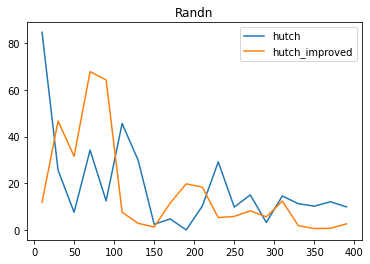

In [70]:
plt.plot(number, ers_hutch1, label="hutch")
plt.plot(number, ers_imphutch1, label="hutch_improved")
plt.legend()
plt.title('Randn')
plt.show()

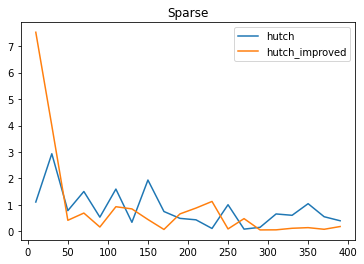

In [71]:
plt.plot(number, ers_hutch2, label="hutch")
plt.plot(number, ers_imphutch2, label="hutch_improved")
plt.legend()
plt.title('Sparse')
plt.show()

2. For random spd matrices with eigenvalues $\lambda_i = i^{-\alpha}$ for several $\alpha$, i.e., for matrices with fast- and slow-decaying spectrum.

In [80]:
diag1 = np.diagflat([i**(-1) for i in range(1,201)])
diag2 = np.diagflat([i**(-0.001) for i in range(1,201)])
diag3 = np.diagflat([i**(-3) for i in range(1,201)])
Q, _ = np.linalg.qr(np.random.uniform(100,-100,(200,200)))
spd1 = Q @ diag1 @ Q.T
spd2 = Q @ diag2 @ Q.T
spd3 = Q @ diag3 @ Q.T

ers_hutch1, ers_imphutch1 = compare(spd1, number)
ers_hutch2, ers_imphutch2 = compare(spd2, number)
ers_hutch3, ers_imphutch3 = compare(spd3, number)

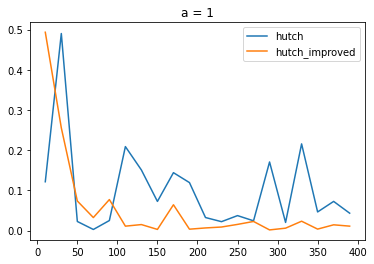

In [81]:
plt.plot(number, ers_hutch1, label="hutch")
plt.plot(number, ers_imphutch1, label="hutch_improved")
plt.legend()
plt.title('a = 1')
plt.show()

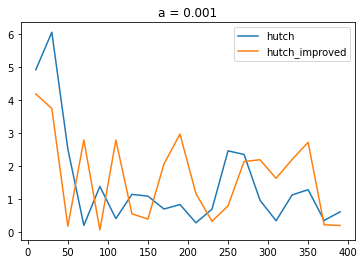

In [82]:
plt.plot(number, ers_hutch2, label="hutch")
plt.plot(number, ers_imphutch2, label="hutch_improved")
plt.legend()
plt.title('a = 0.001')
plt.show()

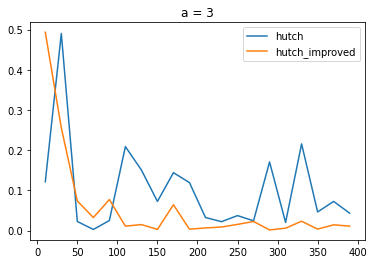

In [83]:
plt.plot(number, ers_hutch1, label="hutch")
plt.plot(number, ers_imphutch1, label="hutch_improved")
plt.legend()
plt.title('a = 3')
plt.show()

3. Summarize your observations.

As we can see on plots, improved Hutchinson algorithm converges faster to true trace of matrix. Also, both algorithms works better with sparse and fast decaying spectrum matrices.

There are some difficlties to estimate trace of low-decay spectrum matrices, as we can see on plot.

# Problem 3 (Universal adversarial attacks) (18 pts) 

## Intro

Suppose we have some classification model $f: X \to Y$ which takes vector $x \in \mathbb{R^n}$ and output some label $y$. It appears that deep neural networks are valunable to small imperceptible perturbations called adversarial attacks. Formally, an adversarial attack is the verctor $\varepsilon \in \mathbb{R^n}$ that leads to misclassification: $y(x) \neq y(x + \varepsilon)$.

<img src="https://openai.com/content/images/2017/02/adversarial_img_1.png" style="display=block; margin:auto">

However, it was shown that there exist universal adversarial perturbations: $\varepsilon \in \mathbb{R^n}$ that leads to misclassification $y(x) \neq y(x + \varepsilon)$ for most of inputs.

The hypetesis is that perturbation of a hidden layer caused by an attack will propagate further in the network changing predicted label of x.

Let $f_i$ be the output of $i$-s hidden layer, then
$$f_i(x + \varepsilon) - f_i(x) \approx J_i(x)\varepsilon$$
So, to find attack we need to solve the folliwing optimization problem
$$
\max_{\|\varepsilon\|_p = 1} \sum\limits_{x \in \text{batch}}\|J_i(x)\varepsilon\|_q^q
$$

## Problem discription

+ Obtain fixed point iteration to solve the problem above using first order optimality condition. **(5 pts)**
+ Suppose additionally that $\varepsilon$ should be sparse: $\|\varepsilon\|_0 \leq k$. Correct the algorithm above using additional truncation operator. **(5 pts)**
+ Implement algorithms 1 and 2. Find universal perturbations on CIFAR dataset using random batch of size 64. Report fooling rate depending on hyperparameters **(8 pts)**
$$
\text{FoolingRate} = \frac{1}{N}\sum\limits_{i = 1}^N \mathbb{1}[y(x + \varepsilon) \neq y(x)]
$$



Let $X_b$ - set of butch's elements. Let's name $$J_i(X_b) = \begin{pmatrix} J_i(x_1) \\
J_i(x_2) \\
\vdots \\
J_i(x_b)
\end{pmatrix}$$
It's cleare, that this matrix constructed by stacking outputs of i-th layer of every element in a batch. And as we can notice:

$$J_i(X_b) \epsilon = \begin{pmatrix} J_i(x_1) \epsilon \\
J_i(x_2) \epsilon \\
\vdots\\
J_i(x_b)\epsilon
\end{pmatrix}$$


So this formulas eqiuvalent :
$\max_\limits{\|\epsilon\|_p = 1} \sum\limits_{x \in \text{batch}}\|J_i(x)\epsilon\|_q^q = \max_\limits{\|\epsilon\|_p = 1} \|J_i(X_b)\epsilon\|_q^q$\
We know that $\max x^p \iff \max x$, where p > 0. So we will maximize: $\| J_i (X_b)\epsilon\|_q$

$$ \max_{\|\epsilon\|_p = 1} \|J_i (X_b)\epsilon\|_q = \max_{\epsilon \neq 0} \frac{\|J_i (X_b)\epsilon\|_q}{\|\epsilon\|_p}$$

First order optimality condition:
$$\frac{\partial }{\partial \epsilon_i} \frac{\|J_i (X_b)\epsilon\|_q}{\|\epsilon\|_p} = 0$$

So we need to derive derivative. Let's look at denominator:
$$ \frac{\partial }{\partial \epsilon_i} \| J_i (X_b)\epsilon \|_q = \frac{\partial }{\partial \epsilon_i} (\| J_i (X_b)\epsilon \|_q^q)^{1/q}) = \frac{1}{q} \| J_i (X_b)\epsilon \|_q^{1 - q} \frac{\partial }{\partial \epsilon_i} \|J_i (X_b)\epsilon \|_q^q$$

$$\frac{\partial }{\partial \epsilon_i} \| J_i (X_b)\epsilon \|_q^q = q \sum_n \left| \sum_m (J_i (X_b))_{nm} \epsilon_m \right| ^{q - 1} \sign \left(\sum_m (J_i (X_b))_{nm} \epsilon_m \right) (J_i (X_b))_{ni} = (q*(J_i (X_b))^T\psi_q(J_i (X_b)\epsilon))_i$$

$$\frac{\partial }{\partial \epsilon_i} \| J_i (X_b)\epsilon \|_q =  \| J_i (X_b)\epsilon \|_q^{1 - q}((J_i (X_b))^T\psi_q(J_i (X_b)\epsilon))_i$$
where used: $\psi_q(x) = \sign(x) |x|^{q - 1}$
$$\frac{\partial }{\partial x_k} \| x \|_p = \| x \|_p^{1 - p}(\psi_p(x))_k$$

$$\frac{\partial }{\partial \epsilon_k} \frac{\|J_i (X_b)\epsilon\|_q}{\|\epsilon\|_p} = \frac{\| J_i (X_b)\epsilon \|_q^{1 - q}((J_i (X_b))^T\psi_q(J_i (X_b)\epsilon))_k}{\| \epsilon \|_p} - \frac{\| J_i (X_b)\epsilon \|_q \| \epsilon \|_p^{1 - p}(\psi_p(\epsilon))_k}{\| \epsilon \|_p^2}$$
In vector form:
$$\frac{\| J_i (X_b)\epsilon \|_q^{1 - q}(J_i (X_b))^T\psi_q(J_i (X_b)\epsilon)}{\| \epsilon \|_p} = \frac{\| J_i (X_b)\epsilon \|_q \| \epsilon \|_p^{1 - p}\psi_p(\epsilon)}{\| \epsilon \|_p^2}$$ 
$$\| \epsilon \|_p^{p} \| J_i (X_b)\epsilon \|_q^{- q}(J_i (X_b))^T\psi_q(J_i (X_b)\epsilon) = \psi_p(\epsilon)$$
Take $p' = \frac{p}{p - 1}$, $(p' - 1)(p - 1) = 1$.
$$\psi_{p'}(\psi_p(ϵ)) = \psi_{p'}(|\epsilon|^{p - 1}\sign(\epsilon)) = ||\epsilon^{(p-1)}|\sign(\epsilon)|^{(p'-1)} \sign(|\epsilon|^{p - 1}\sign(\epsilon)) = |\epsilon|^{(p-1)(p'-1)} \sign(\epsilon) = |\epsilon|\sign(\epsilon) = ϵ$$
Result:
$$\epsilon = \psi_{p'}(\| \epsilon \|_p^{p} \| J_i (X_b)\epsilon \|_q^{- q}(J_i (X_b))^T\psi_q(J_i (X_b)\epsilon)) = \| \epsilon \|_p^{p(p' - 1)} \| J_i (X_b)\epsilon \|_q^{-q(p' - 1)}\psi_{p'}((J_i (X_b))^T\psi_q(J_i (X_b)\epsilon))$$
Algo: 
1) Build $J_i(X_b)$\
2) Take some random $\epsilon$. Do $\epsilon \rightarrow \frac{\epsilon}{\| \epsilon \|_p}$\
3) Until convergence, do: $ɛ_{k + 1} = \| \hat J ɛ_k \|_q^{-q(p' - 1)}\psi_{p'}((J_i(X_b))^T\psi_q(J_i(X_b) ɛ_k)), \quad \epsilon_{k + 1} \rightarrow \frac{\epsilon_{k + 1}}{\| \epsilon_{k + 1} \|_p}$\
4) Return $\varepsilon_k$ 



In [1]:
import torch
import torch.nn as nn
import requests
from torch import autograd

In [3]:
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)


def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None


def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [4]:
class CifarNet(nn.Module):
    def __init__(self):
        super(CifarNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3)

        self.pool = nn.MaxPool2d(2, 2)

        self.relu = nn.ReLU(inplace=True)
        self.fc1 = nn.Linear(3200, 256)
        
        self.dropout = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.pool(x)

        x = x.view(-1, 3200)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        
        x = self.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [5]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

file_id = "1qrNvr3eLYjvbkVg5jY2sYA2rqK9XkTXs"
download_file_from_google_drive(file_id, "./cifar_checkpoint.pth")

model = CifarNet().to(device)
model.load_state_dict(torch.load("./cifar_checkpoint.pth", map_location="cpu"))

<All keys matched successfully>

In [6]:
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [13]:
matched = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        matched += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * matched // total} %')

Accuracy of the network on the 10000 test images: 67 %


In [29]:
def truncation(x, k):
    eps = x.reshape(-1)
    ind = torch.argsort(torch.abs(eps), dim=-1)[-k:]
    res = torch.zeros(x.reshape(-1).shape)
    res[ind] = eps[ind]
    return res.reshape(x.shape)


def psi(x, p=2):
    return torch.sign(x) * torch.abs(x) ** (p - 1) 


def power_method(p, q, k, model, images):
    model.eval()
    x = torch.rand(3, 32, 32)
    x /= torch.linalg.norm(x.flatten(), ord=p)

    if p == torch.inf:
        p_1 = 1
    elif p == 1:
        p_1 = torch.inf
    else:
        p_1 = p / (p - 1)

    for i in range(10):
      x = torch.stack((x, x) * (batch_size // 2))
      _, Jx = autograd.functional.jvp(model, images, x)
      s = torch.linalg.norm(Jx.flatten(), ord=q)
      _, x = autograd.functional.vjp(model, images, psi(Jx, q))

      x = x.sum(dim=0)
      x = psi(x, p_1) * (s ** (q * p_1 - 1))
      x = truncation(x, k)
      x /= torch.linalg.norm(x.flatten(), ord=p)
    return x

In [31]:
from tqdm.notebook import tqdm


def adversarial_attack(p, q, k):
    fools = 0
    total = 0
    images, _ = next(iter(trainloader))
    noise = power_method(p, q, k, model, images)
    with torch.no_grad():
        for images, labels in tqdm(testloader):
            outputs = model(images)
            _, pred = torch.max(outputs.data, 1)
            
            adv_attack = images + noise
            adv_attack = torch.tensor(adv_attack, dtype=torch.float, device=device)
            _, adv_pred = torch.max(model(adv_attack).data, 1)

            total += labels.size(0)
            fools += (adv_pred != pred).sum().item()

    print(f'Fool rate: {100 * fools // total} %')

In [32]:
adversarial_attack(3, 8, 1000)

  0%|          | 0/157 [00:00<?, ?it/s]

<ipython-input-31-35fb6b795ec2>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  adv_attack = torch.tensor(adv_attack, dtype=torch.float, device=device)


Fool rate: 89 %


In [33]:
adversarial_attack(torch.inf, 10, 1500)

  0%|          | 0/157 [00:00<?, ?it/s]

<ipython-input-31-35fb6b795ec2>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  adv_attack = torch.tensor(adv_attack, dtype=torch.float, device=device)


Fool rate: 85 %


In [34]:
adversarial_attack(10, 5, 200)

  0%|          | 0/157 [00:00<?, ?it/s]

<ipython-input-31-35fb6b795ec2>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  adv_attack = torch.tensor(adv_attack, dtype=torch.float, device=device)


Fool rate: 89 %


In [36]:
adversarial_attack(2, 2, 2000)

  0%|          | 0/157 [00:00<?, ?it/s]

<ipython-input-31-35fb6b795ec2>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  adv_attack = torch.tensor(adv_attack, dtype=torch.float, device=device)


Fool rate: 10 %


In [37]:
adversarial_attack(4, 7, 50)

  0%|          | 0/157 [00:00<?, ?it/s]

<ipython-input-31-35fb6b795ec2>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  adv_attack = torch.tensor(adv_attack, dtype=torch.float, device=device)


Fool rate: 89 %


In [38]:
adversarial_attack(torch.inf, 20, 700)

  0%|          | 0/157 [00:00<?, ?it/s]

<ipython-input-31-35fb6b795ec2>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  adv_attack = torch.tensor(adv_attack, dtype=torch.float, device=device)


Fool rate: 89 %


# Problem 4 (Image restoration) (23 pts) 

Image restoration is the task where we need to eliminate blurring and some random noise to get ideal image. Practically, images obtained in real life could be represented in following way:

$$g = f * h + n$$

where $g$ - obtained image of size $(N,N)$, $h$ - blur kernel of size $(3,3)$, $n$ - an additive zero-mean Gaussian white noise, and $f$ - ideal image (deblurred and denoised). In our work we will use gaussian blur kernel with window size 3:

$$h = \frac{1}{16}\begin{pmatrix}1 & 2 & 1\\ 2 & 4 & 2\\ 1 & 2 & 1\end{pmatrix}$$

Here $f*h$ is a 2-d convolution of ideal image with blur kernel, which could be rewritten in matrix format:

$$f * h = H \mathrm{vec}(f)$$

where $H$ - block Toeplitz with Toeplitz blocks matrix which corresponds to 2-d convolution with kernel $h$, $\mathrm{vec}(\cdot)$ - operation of vectorization.

So, let us write the task of finding $f$ as optimization problem:

$$\min\limits_{f,u} \|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u)\|_2^2 + \alpha_2\|u\|_{\mathrm{TV}}$$
where $\|u\|_{\mathrm{TV}} = \sum\limits_{1\leq j,k\leq N-1}\|\nabla u_{j,k}\|_2 = \sum\limits_{1\leq j,k\leq N-1}\sqrt{(u_{j+1,k}-u_{j,k})^2 + (u_{j,k+1}-u_{j,k})^2}$ here we calculate gradients (pixel differences) along **x** and **y** image dimensions.

One can notice that problem could be splitted on two:

$$\min\limits_{u}\min\limits_f \{\|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u)\|_2^2\} + \alpha_2\|u\|_{\mathrm{TV}}$$

To find the solution we will use iterative method:

$$\begin{cases}
f^{(i)} = \arg\min\limits_f \|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u^{(i-1)})\|_2^2 & (a)\\
u^{(i)} = \arg\min\limits_u \alpha_1\|\mathrm{vec}(f^{(i)}-u)\|_2^2 + \alpha_2\|u\|_{\mathrm{TV}} & (b)
\end{cases}$$

Taking matrix derivative over the minimization functional in subproblem **(a)** we get the system:

$$(H^TH + \alpha_1I)\mathrm{vec}(f) = H^T\mathrm{vec}(g)+\alpha_1\mathrm{vec}(u^{(i-1)})$$

This system can be solved by conjugate gradient method. Also, taking into account that $H$ is block Toeplitz with Toeplitz blocks (BTTB), we can make fast matrix by vector multiplication.

The subproblem **(b)** could be solved by using any kind of solver of your choice.

**So, your task is to:**

1. Implement creation and fast matrix by vector multiplication for matrix $H$ **(6 pts)**
2. Implement solver for subproblem **(a)** based on conjugate gradient descent using fast matrix by vector multiplication for $H$. **(8 pts)**
3. Implement some solver for subproblem **(b)** **(3 pts)**
4. Implement iterative solver for the total problem using solvers for subproblems **(a)** and **(b)** **(3 pts)**
5. Blur (use defined blurring kernel) given image and add gaussian noise with zero mean and some variance (up to you). Try to restore the image, compare the result with the original one. Make a conclusion. **(3 pts)**


In [84]:
from PIL import Image, ImageOps

In [85]:
!wget --no-check-certificate \
    "https://github.com/oseledets/nla2022/blob/main/hw2/lena.png?raw=true" \
    -O "/lena.png"

--2022-12-11 16:37:23--  https://github.com/oseledets/nla2022/blob/main/hw2/lena.png?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/oseledets/nla2022/raw/main/hw2/lena.png [following]
--2022-12-11 16:37:23--  https://github.com/oseledets/nla2022/raw/main/hw2/lena.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/oseledets/nla2022/main/hw2/lena.png [following]
--2022-12-11 16:37:23--  https://raw.githubusercontent.com/oseledets/nla2022/main/hw2/lena.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20329 (

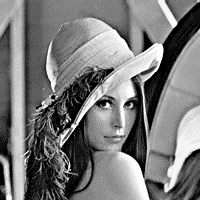

In [86]:
orig_image = ImageOps.grayscale(Image.open("/lena.png"))
orig_image

  1.

In [91]:
def get_H(h,f):
    matrix = []
    size = h.shape[0]
    center = size // 2
    for i in range(2 * f.shape[0] - 1):
        if i < f.shape[0]:
            if size >= center + i + 1:
                column = h[size - center - i - 1, :center+1]
                column = np.pad(column[::-1], (0, f.shape[0] - center - 1), mode='constant')
                row = h[size - center - i - 1, center+1:]
                row = np.pad(row, (0, f.shape[0] - center - 1), mode='constant')
                col = np.concatenate((column, row[::-1]))
                if len(matrix) == 0:
                    matrix = col.reshape(-1,1)
                else:
                    matrix = np.hstack((matrix, col.reshape(-1,1)))
            else:
                matrix = np.hstack((matrix, np.zeros(( 2 * f.shape[0] - 1, 1))))
        else:
            if i  >= 2 * f.shape[0] - size + center:
                column = h[center+ 2 * f.shape[0] - i - 1, :center+1]
                column = np.pad(column[::-1], (0, f.shape[0] - center - 1), mode='constant')
                row = h[center+ 2 * f.shape[0] - i - 1, center+1:]
                row = np.pad(row, (0, f.shape[0] - center - 1), mode='constant')
                col = np.concatenate((column, row[::-1]))
                matrix = np.hstack((matrix, col.reshape(-1,1)))
            else:
                matrix = np.hstack((matrix, np.zeros(( 2 * f.shape[0] - 1, 1))))
        
    return matrix

In [168]:
def matvec(t, f):
    return np.fft.ifft2(np.fft.fft2(t) * np.fft.fft2(f, s=(2*f.shape[0]-1, 2*f.shape[0]-1))).real[:f.shape[0], :f.shape[1]]

In [169]:
h = np.array([[1,2,1],[2,4,2],[1,2,1]])
h = h / h.sum()
img = np.array(orig_image)

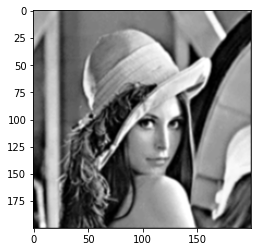

In [170]:
tmp = get_H(h, img)
bl = matvec(tmp, img)
plt.imshow(bl, cmap="gray")

  2.

In [221]:
def Ax(h, f, a):
    return matvec(h, matvec(h,f)) + a * f

In [222]:
def b(h, g, a, u):
    return matvec(h, g) + a * u

In [223]:
def solver1(h, a, g, u):
    f = np.random.uniform(0,255, g.shape)
    r = b(h, g, a, u) - Ax(h, f, a)
    p = r
    while np.linalg.norm(b(h, g, a, u) - Ax(h, f, a)) > 1:
        r_old_dot = (r * r).sum()
        Ap = Ax(h, p, a)
        alpha = r_old_dot / (Ap * p).sum()
        f = f + alpha * p
        r_new = r - alpha * Ap
        beta = (r_new * r_new).sum() / r_old_dot
        r = r_new
        p = r + beta * p
    return f

3.

In [224]:
import cvxpy as cp

In [225]:
def solver2(f, a1, a2):
    u = cp.Variable(f.shape)
    minimize = cp.Minimize(a1*cp.sum_squares(f-u) + a2*cp.tv(u))  
    cp.Problem(minimize).solve(solver=cp.SCS, max_iters=1500)
    return u.value

4.

In [226]:
def main_solver(g, h, a1, a2):
      u = np.random.uniform(-100, 100, g.shape)
      for i in range(15):
        f = solver1(h, a1, g, u)
        u = solver2(f, a1, a2)
      f = solver1(h, a1, g, u)
      return f

5.

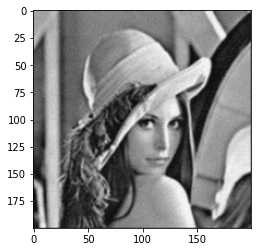

In [227]:
t = get_H(h, img)
distored = matvec(t, img)
distored += np.random.normal(0,5, distored.shape)
plt.imshow(distored, cmap='gray')
plt.show()

In [230]:
res2 = main_solver(distored, t, 0.2, 0.1)

/usr/local/lib/python3.8/dist-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


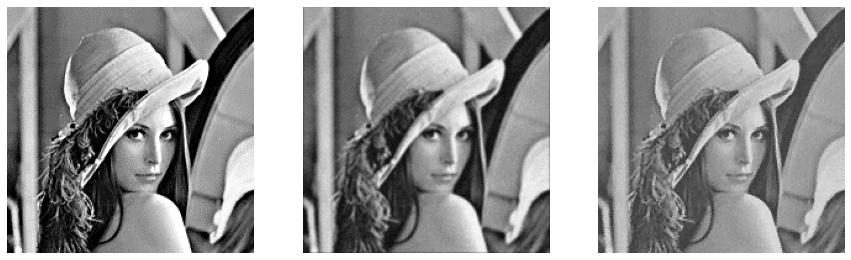

In [231]:
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(1, 3, 1)
plt.imshow(img,cmap='gray')
plt.axis('off')
fig.add_subplot(1, 3, 2)
plt.imshow(distored, cmap='gray')
plt.axis('off')
fig.add_subplot(1, 3, 3)
plt.imshow(res2, cmap='gray')
plt.axis('off')
plt.show()

As we can see, restored image has less noise and it less blurred, but of course not so good as original. So algorithm of minimization of loss, mentioned above, really works, we just need to find adequate a1 and a2 coefficients and choose appropriate solver for b, so it will converge. And more iteration we take, more sharpened become restored image